# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression, random forest, XGBOOST task as it involves just two variables

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

Importing all libraries required in this notebook

In [96]:
import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import r2_score

Reading data from remote link


In [97]:
url = "http://bit.ly/w-data"
student = pd.read_csv(url)
print("Student data is Ready")

Student data is Ready


In [98]:
student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [99]:
student.shape

(25, 2)

In [100]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

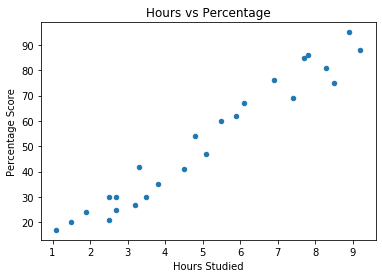

In [101]:
student.plot(x='Hours', y='Scores',kind='scatter')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

plt.show()

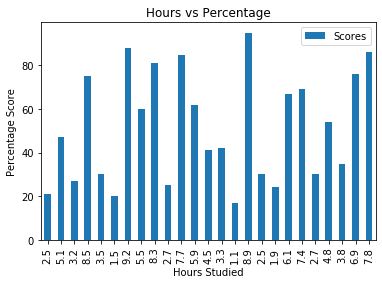

In [102]:
student.plot(x='Hours', y='Scores',kind='bar')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

plt.show()

Preparing the data

In [103]:
X = student.iloc[:, :-1].values  
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [104]:
y = student.iloc[:, 1].values
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


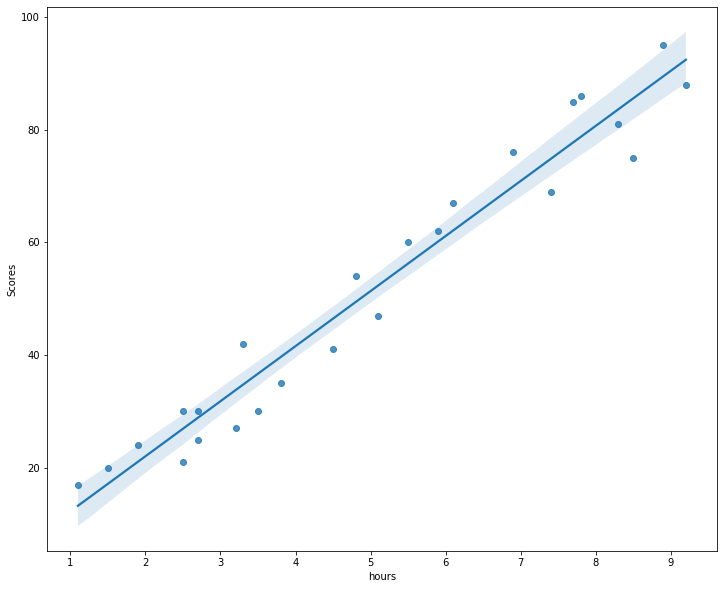

In [105]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('hours')
plt.ylabel("Scores")
plt.show();

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

model_ linear regression

In [107]:
model_1 =LinearRegression()
#model_1.fit(X_train, y_train)

model_2 random forest

In [108]:
model_2 =RandomForestRegressor(n_estimators = 1)
model_3 =RandomForestRegressor(n_estimators = 10)
model_4 =RandomForestRegressor(n_estimators = 50)
model_5 =RandomForestRegressor(n_estimators = 100)

#model_2.fit(X_train, y_train)

model_3 XGBOOST 

In [109]:
model_6 =GradientBoostingRegressor()
#model_3.fit(X_train, y_train)

In [110]:
models = [model_1, model_2, model_3, model_4, model_5,model_6]

In [111]:
#model.fit(X_train, y_train)

In [112]:
from sklearn.metrics import mean_absolute_error
# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %.2f'" % (i+1, mae))

Model 1 MAE: 4.13'
Model 2 MAE: 8.00'
Model 3 MAE: 5.43'
Model 4 MAE: 5.35'
Model 5 MAE: 5.18'
Model 6 MAE: 7.95'


In [113]:
from sklearn.metrics import mean_squared_error
# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_squared_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %.2f'" % (i+1, mae))

Model 1 MAE: 20.33'
Model 2 MAE: 92.29'
Model 3 MAE: 67.38'
Model 4 MAE: 52.89'
Model 5 MAE: 56.52'
Model 6 MAE: 89.15'


select best model which have less no of MAE

In [114]:
my_model = model_1

In [115]:
my_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
pred= my_model.predict(X_test)

In [117]:
pred_result= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
pred_result

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [118]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Root Mean Squared Error: 4.509204328368805


# plotting the grid to depict the actual and predicted value

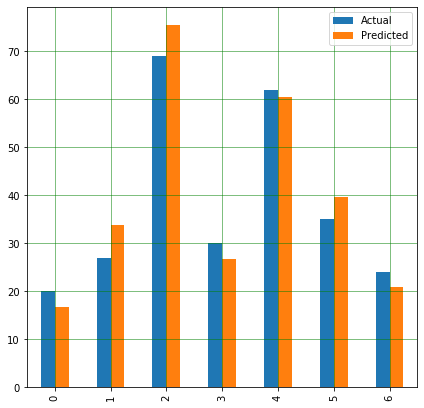

In [119]:

pred_result.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='b')
plt.show()

# My own prediction 

In [120]:
hours =[9.25]
import numpy as np
arr=np.array(hours)
own_pred = my_model.predict(arr.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.89272889341652
